In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
%matplotlib inline

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

import env 
import corner as DFM

In [2]:
# read in illustris SFH file from Tijske
dat = h5py.File('binsv2all1e8Msunh_z0.hdf5', 'r')
dat.keys()
# current stellar mass [10^10 Msun]

[u'CurrentStellarMass',
 u'FormedStellarMass',
 u'MeanStellarAge',
 u'MeanStellarMetallicity']

In [3]:
galpop = {}
galpop['M*'] = dat['CurrentStellarMass'].value.flatten() * 1e10

In [4]:
# formed stellar mass is in a grid of time bins and metallicity
t_bins = np.array([0.0, 0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475,0.55,0.65,0.75,0.85,0.95,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,3.125,3.375,3.625,3.875,4.25,4.75,5.25,5.75,6.25,6.75,7.25,7.75,8.25,8.75,9.25,9.75,10.25,10.75,11.25,11.75,12.25,12.75,13.25,13.75])

In [5]:
sfh_grid = dat['FormedStellarMass'].value
dM_t = np.sum(sfh_grid, axis=1) # sum up all the metallicities so you have delta M* in a grid of galaxies and time 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


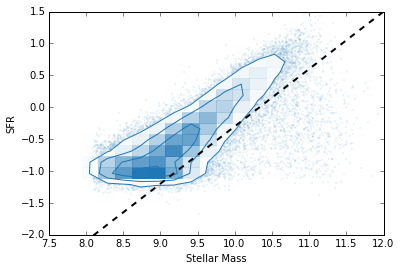

In [6]:
galpop['sfr'] = (1e10 * (dM_t[:,0] + dM_t[:,1])/(0.015 * 1e9)).flatten() # 'current' SFR averaged over the last 0.015 Gyr

fig = plt.figure() 
sub = fig.add_subplot(111)
DFM.hist2d(np.log10(galpop['M*']), np.log10(galpop['sfr']), range=[[7.5, 12.], [-2., 1.5]], color='#1F77B4')
m_arr = np.arange(6., 12.1, 0.1)
sub.plot(m_arr, 0.9 * (m_arr - 10.5) + 0.15, c='k', lw=2, ls='--')
sub.set_xlabel('Stellar Mass')
sub.set_ylabel('SFR')

Star-forming galaxies at $z \sim 0$

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(-2.0, 1.5)

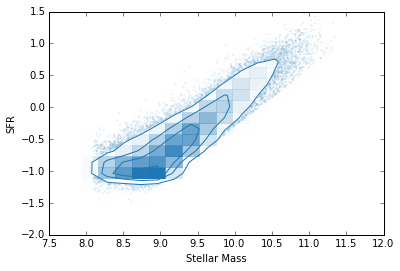

In [7]:
logm = np.log10(galpop['M*'])
logsfr = np.log10(galpop['sfr'])

sfrcut = 0.9 * (logm - 10.5) + 0.15
is_SF = np.where(logsfr > sfrcut)

fig = plt.figure() 
sub = fig.add_subplot(111)
DFM.hist2d(logm[is_SF], logsfr[is_SF], range=[[7.5, 12.], [-2., 1.5]], color='#1F77B4')
sub.set_xlabel('Stellar Mass')
sub.set_xlim([7.5, 12.])
sub.set_ylabel('SFR')
sub.set_ylim([-2., 1.5])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


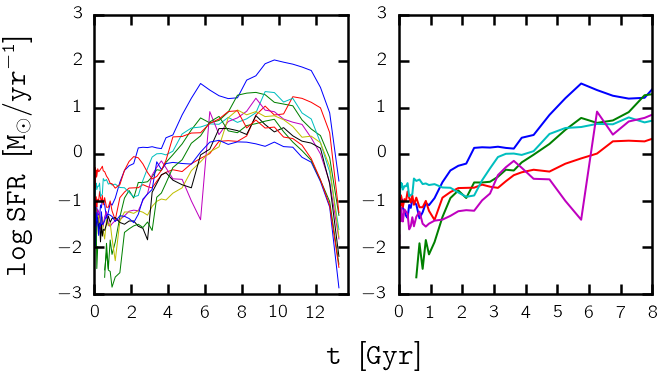

In [8]:
prettyplot()
fig = plt.figure(figsize=(10,5))
bkgd = fig.add_subplot(111, frameon=False)
sub = fig.add_subplot(121)
for i in range(10): 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i))
sub.set_xlim([0,13.75])

sub = fig.add_subplot(122)
for i in range(5): 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i), lw=2)
sub.set_xlim([0., 8.])

bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{t \;\;[Gyr]}$', labelpad=20, fontsize=30) 
bkgd.set_ylabel(r'$\mathtt{log \;SFR \;\;[M_\odot/yr^{-1}]}$', labelpad=20, fontsize=30) 

### SFH of star-forming galaxies 
High stellar mass 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


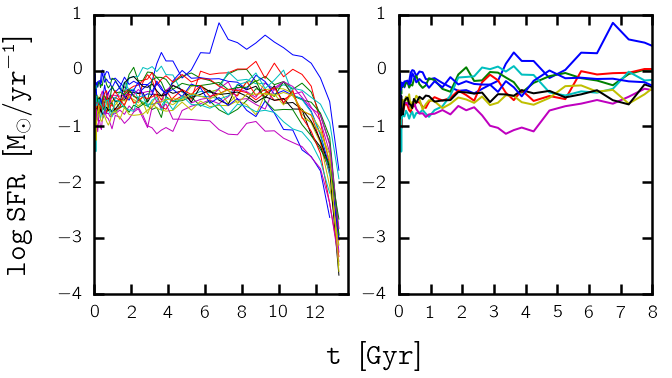

In [9]:
fig = plt.figure(figsize=(10,5))
bkgd = fig.add_subplot(111, frameon=False)
sub = fig.add_subplot(121)
for i in is_SF[0][:20]: 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i))
sub.set_xlim([0,13.75])

sub = fig.add_subplot(122)
for i in is_SF[0][:8]: 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i), lw=2)
sub.set_xlim([0., 8.])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{t \;\;[Gyr]}$', labelpad=20, fontsize=30) 
bkgd.set_ylabel(r'$\mathtt{log \;SFR \;\;[M_\odot/yr^{-1}]}$', labelpad=20, fontsize=30) 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


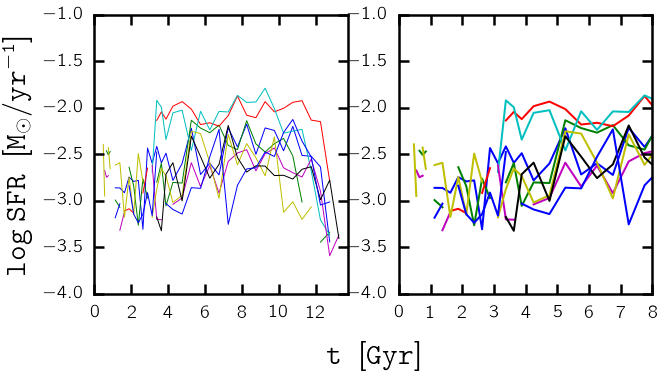

In [10]:
fig = plt.figure(figsize=(10,5))
bkgd = fig.add_subplot(111, frameon=False)
sub = fig.add_subplot(121)
for i in is_SF[0][-8:]: 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i))
sub.set_xlim([0,13.75])

sub = fig.add_subplot(122)
for i in is_SF[0][-8:]: 
    dm_i = sfh_gt[i,:]
    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    sub.plot(t_bins[:-1], np.log10(sfr_i), lw=2)
sub.set_xlim([0., 8.])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{t \;\;[Gyr]}$', labelpad=20, fontsize=30) 
bkgd.set_ylabel(r'$\mathtt{log \;SFR \;\;[M_\odot/yr^{-1}]}$', labelpad=20, fontsize=30) 

In [ ]:
fig = plt.figure() 
sub = fig.add_subplot(111)
DFM.hist2d(logm[is_SF], logsfr[is_SF], range=[[7.5, 12.], [-2., 1.5]], color='#1F77B4')
sub.set_xlabel('Stellar Mass')
sub.set_xlim([7.5, 12.])
sub.set_ylabel('SFR')
sub.set_ylim([-2., 1.5])